In [3]:
import pandas as pd 


data = pd.read_csv("pvq21CENTRED.csv", sep=',')

In [4]:
lrscale = data['lrscale']

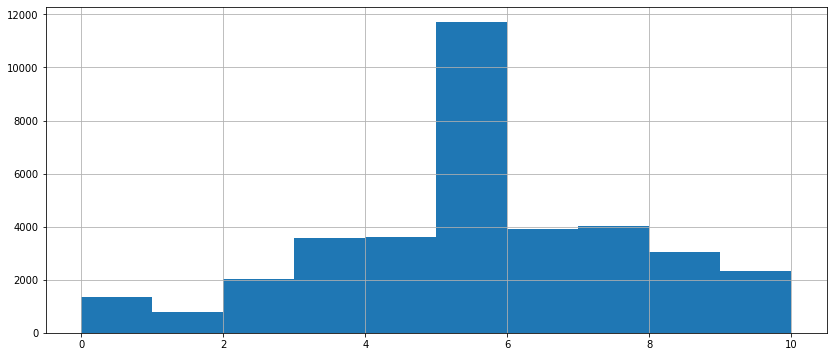

In [5]:
lrscale.hist(bins=10, figsize=[14,6])

In [6]:
data['lrscale']


0        0
1        1
2        5
3        0
4        5
        ..
36355    1
36356    5
36357    0
36358    4
36359    4
Name: lrscale, Length: 36360, dtype: int64

In [7]:
def normalise (value):
    if int(value) > 5:
        return 2
    elif int(value) == 5:
        return 1
    elif int(value) < 5:
        return 0
    

    

In [8]:
data['lrscale'] = data['lrscale'].apply(normalise)

In [9]:
data

,Unnamed: 0,lrscale,universalism,achievement,benevolence,self_direction,stimulation,hedonism,power,security,conformity,tradition,p_avg
0,0,0,1.50,2.500000,1.500000,3.000000,3.500000,4.000000,4.000000,4.500000,6.000000,4.500000,3.5
1,1,0,2.20,2.866667,2.366667,2.366667,3.866667,3.866667,3.866667,4.366667,4.866667,4.366667,3.5
2,2,1,2.35,5.350000,2.350000,2.850000,6.350000,2.850000,4.350000,1.350000,4.350000,2.850000,3.5
3,3,0,3.40,3.566667,3.566667,3.066667,4.066667,3.066667,3.566667,3.066667,4.566667,3.066667,3.5
4,4,1,2.55,4.383333,1.883333,2.883333,4.883333,1.883333,4.383333,4.383333,4.383333,3.383333,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36355,44382,0,4.85,3.350000,2.850000,2.850000,2.850000,2.850000,3.850000,2.850000,5.350000,3.350000,3.5
36356,44383,1,3.25,3.083333,2.583333,2.583333,5.083333,4.083333,4.583333,3.083333,3.083333,3.583333,3.5
36357,44384,0,2.70,2.866667,3.366667,2.866667,4.366667,5.866667,4.866667,2.866667,2.366667,2.866667,3.5
36358,44385,0,3.50,3.000000,3.500000,3.000000,3.000000,2.500000,3.500000,3.000000,5.500000,4.500000,3.5


# Model


In [10]:
import csv, numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
#TEMP 
from sklearn.linear_model import LinearRegression, Lasso

In [11]:
model_data = data.to_numpy()

x_df = data.iloc[:, 2:12].copy()
y_df = data.iloc[:,1].copy()
# X data --> All columns but 0,1,& 13 &&& y data --> column 1
# X, y = data[:, 2:12], data[:, 1]

X = x_df.to_numpy()
y = y_df.to_numpy()


In [12]:
num_test = 0.20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=num_test, random_state=23)

## LASSO (≈ 0.318)

In [13]:
model = Lasso(alpha=1.0)
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive|
scores = np.absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Mean MAE: 0.692 (0.006)


In [14]:
model.fit(X_train, y_train)
predicted = model.predict(X_test)
print(predicted)
print("Accuracy of: ", np.mean(predicted.astype(int) == y_test.astype(int)))

[1.05294279 1.05294279 1.05294279 ... 1.05294279 1.05294279 1.05294279]
Accuracy of:  0.3179317931793179


## Linear Regression (≈ 0.318)

In [15]:
reg = LinearRegression()
reg.fit(X_train, y_train)
predicted_float = reg.predict(X_test)
print(predicted_float)

print("Accuracy of: ", np.mean(predicted.astype(int) == y_test.astype(int)))

[0.95587921 1.16639709 1.24474335 ... 0.86523438 0.92027283 1.02198029]
Accuracy of:  0.3179317931793179


## Logistic Regression (≈)

In [2]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0)

clf.fit(X_train,y_train)

lr_predicted = clf.predict(X_test)

print("Accuracy of Logistic Regression:", np.mean(predicted.astype(int) == y_test.astype(int)))

NameError: name 'X_train' is not defined

## Random Forest (≈ 0.41)

In [40]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)

predicted = clf.predict(X_test)
print("Accuracy of: ", np.mean(predicted.astype(int) == y_test.astype(int)))



Accuracy of:  0.41487898789878985


# Principle Component Analysis